# Задание 1

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

### 1. Загрузка датасета Salary.csv

In [88]:
df = pd.read_csv('Salary.csv')

In [89]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [91]:
df['YearsExperience'].mode()

0    3.2
1    4.0
Name: YearsExperience, dtype: float64

In [92]:
df['Salary'].mode()

0      37731
1      39343
2      39891
3      43525
4      46205
5      54445
6      55794
7      56642
8      56957
9      57081
10     57189
11     60150
12     61111
13     63218
14     64445
15     66029
16     67938
17     81363
18     83088
19     91738
20     93940
21     98273
22    101302
23    105582
24    109431
25    112635
26    113812
27    116969
28    121872
29    122391
Name: Salary, dtype: int64

### 2. Построение гистограммы распределения зарплат и гистограммы распределения опыта работ, прокомментируйте полученный результат

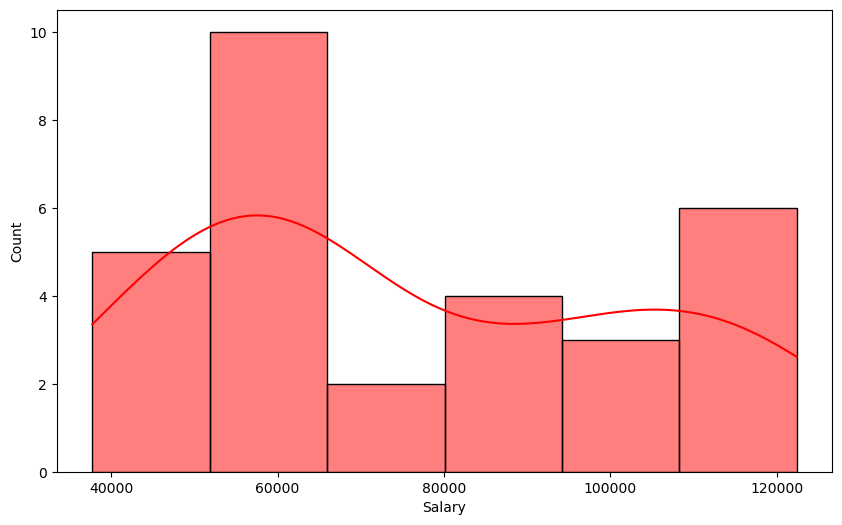

In [93]:
plt.figure(figsize=(10,6))
sns.histplot(data = df[['Salary']], x = 'Salary', color = 'red', kde = True)
plt.show()

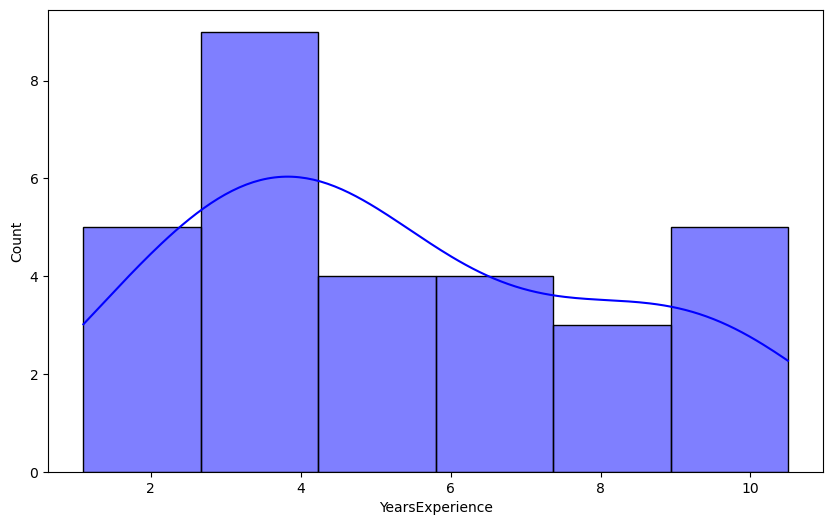

In [94]:
plt.figure(figsize=(10,6))
sns.histplot(data = df[['YearsExperience']], x = 'YearsExperience', color = 'blue', kde = True)
plt.show()

#### Визуально гистограмма не соответствуют нормальному распределению. Скорее всего похоже на равномерное. 
Распредение зп: смещено влево, чаще встречаются более низкие заработные платы. Распределение опыта более разбросано, но так же имеет тенденцию концентрироваться слева (на нижней границе). Можно сделать предположение, что в данном датасете по мере увеличения опыта увеличивается заработная плата. Данное предположение стоит в дальнейшем проверить (с помощью диаграммы рассеяния).

### 3. Построение точечного графика зависимости зп от опыта работы

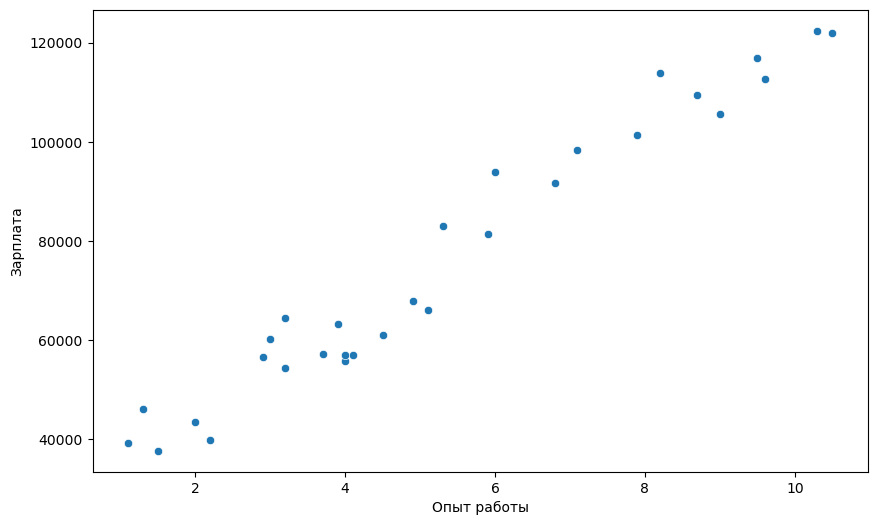

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'YearsExperience', y = 'Salary')
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата')
plt.show()

#### Диаграмма рассеяния показывает, что предположение оказалось верным: с увеличением стажа растет и зарплата. Тенденция выглядит близкой к линейной, есть некоторые небольшие отклонение, но зарплата увеличивается примерно пропорционально опыту работы

### 4. Отскалируйте данные зп при помощи MinMaxScaler

In [96]:
scaler = MinMaxScaler()
df['Salary'] = scaler.fit_transform(df[['Salary']])
df

,YearsExperience,Salary
0,1.1,0.019041
1,1.3,0.100094
2,1.5,0.000000
3,2.0,0.068438
4,2.2,0.025514
5,2.9,0.223376
6,3.0,0.264812
7,3.2,0.197425
8,3.2,0.315545
9,3.7,0.229837


### 5. Инициализаци модели, разделение выборки, обучение модели, измерение метрик

In [97]:
X = df[['YearsExperience']]
y = df[['Salary']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [98]:
X_train

,YearsExperience
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0
22,7.9
1,1.3
2,1.5
25,9.0


In [99]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [100]:
predict = model.predict(X_test)

In [101]:
mean_absolute_error(y_test,predict)

0.06096537574297405

In [102]:
r2_score(y_test, predict)

0.9414466227178214

In [103]:
mean_squared_error(y_test, predict)

0.005271801128195493

### Вывод
По метрике mse дает меньшее, лучшее значение чем метрика mae. r2_score метрика говорит о хорошем качестве модели линейной регрессии (0.94)

### 6. Построение графика линеййной регрессии на точечной графике зависимости зп от опыта работы

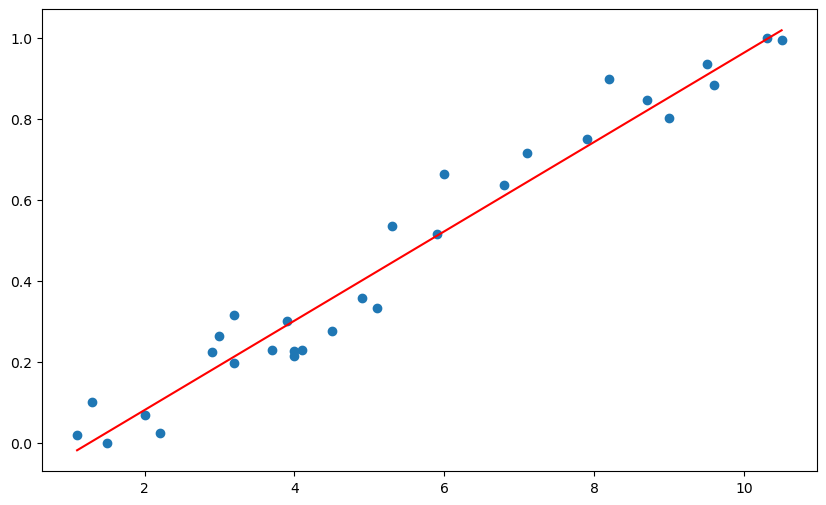

In [104]:
w0,w1 = model.intercept_, model.coef_[0]
x_value = np.linspace(np.min(df['YearsExperience']), np.max(df['YearsExperience']),100)
y_value = w0 + w1*x_value

plt.figure(figsize=(10,6))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(x_value,y_value,color = 'red')
plt.show()

# Задание 2

### 1. Загрузка датасета Insurance.csv

In [105]:
df = pd.read_csv('Insurance.csv')

In [106]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [45]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2767,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False
2769,False,False,False,False,False,False,False
2770,False,False,False,False,False,False,False


Функция используется для устранения пробела в данных. Пробелы в данных отсутствуют

In [108]:
np.any(df.isna().values)

False

### 2. Анализ датасета

#### 2.1 Гистограмма возраста группы

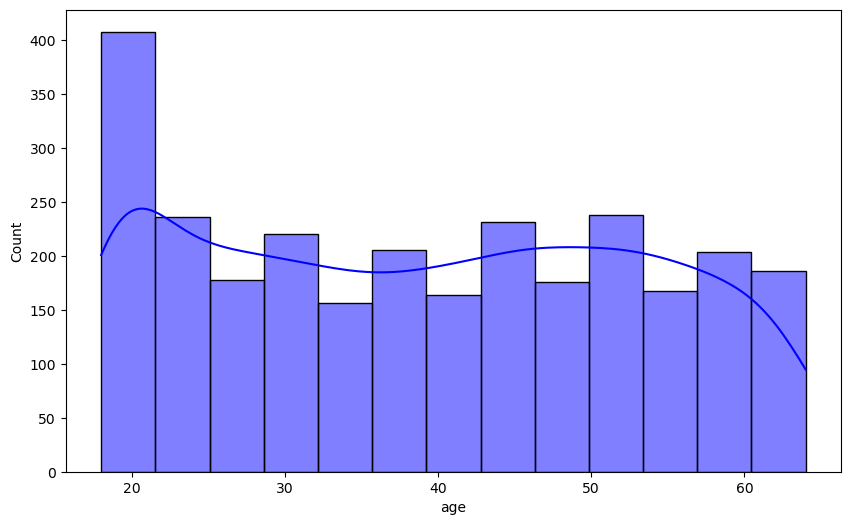

In [109]:
plt.figure(figsize=(10,6))
sns.histplot(data = df[['age']], x = 'age', color = 'blue', kde = True)
plt.show()

Визуально гистограмма возраста не соответсвует нормальному распределению. И скорее всего соответствует равномерному распределению

#### 2.2 Узнайте количество мужчин и женщин

In [111]:
df[['sex']].value_counts()

sex   
male      1406
female    1366
Name: count, dtype: int64

Соотношение мужчин и жензин примерно одинаковое.

#### 2.3 Средний индекс массы тела

In [112]:
df[['bmi']].mean()

bmi    30.701349
dtype: float64

#### 2.4 Количество курящих и не курящих

In [50]:
df[['smoker']].value_counts()

smoker
no        2208
yes        564
Name: count, dtype: int64

Соотношение имеет перевес в сторону не курящих

#### 2.5 У скольких людей есть дети

In [51]:
(df['children'] != 0).value_counts()

children
True     1586
False    1186
Name: count, dtype: int64

#### 2.6 Сколько людей с каких регионов

In [52]:
df['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

#### 2.7 Вывод о сбалансированности набора данных
В первом интервале возрастных групп количество больше практически в два раза чем в каждом следующем интервале
Гистограмма возраста: большая концентрация молодых людей, но затем идут сбалансированные данные. Относительно пола людей: получилось довольно сбалансированно, практически 50 на 50. Средний индекс массы тела, на мой взгляд, мало, что говорит. Потому что если брать средний по полу, уже будет нагляднее. Не курящих в 4 раза больше, чем курящих, это странно. С детьми больше людей, но все равно сбалансированные данные. Регионы сбалансированы.

### 3. Найдите максимальную и минимальную выплату. Сравние данных людей по всем средним показателям (вещественными показателями) группы

In [53]:
df['charges'].max()

63770.42801

In [54]:
df['charges'].min()

1121.8739

Максимальные выплаты больше практически в 6 раз, чем минимальные

In [55]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Просмотр данных датасета для большей визуализации

In [56]:
df.loc[df['charges'].idxmax()]

age                  54
sex              female
bmi               47.41
children              0
smoker              yes
region        southeast
charges     63770.42801
Name: 543, dtype: object

In [57]:
df.loc[df['charges'].idxmin()]

age                18
sex              male
bmi             23.21
children            0
smoker             no
region      southeast
charges     1121.8739
Name: 940, dtype: object

In [58]:
max_charges = df.loc[df['charges'].idxmax()]
min_charges = df.loc[df['charges'].idxmin()]

mean_values = df.mean(numeric_only=True)

comparison = pd.DataFrame({
    'Person with max': max_charges,
    'Person with min': min_charges,
    'Mean': mean_values
})

comparison = comparison.loc[['age', 'bmi', 'children', 'charges']]
print(comparison)


         Person with max Person with min          Mean
age                   54              18     39.109668
bmi                47.41           23.21     30.701349
children               0               0      1.101732
charges      63770.42801       1121.8739  13261.369959


#### Вывод:
У человека с минимальной выплатой все показатели ниже среднего, даже индекс массы тела, что хорошо, вероятно он ведет здоровый образ жизни.
Что касается человека с максимальной, то у него все показатели выше: от возраста зависит стаж, видимо ведется сидячий образ жизни.
Так же стоит отметить, что у обоих отсутсвуют дети: у человека с минимальной выплатоц, на мой взгляд, в силу возраста, в то время как у человека с большей, вероятно, нет на них времени.

### 4. Предобработка данных для использования в модели (переведите категориальные признаки в вещественные)

In [113]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
df.select_dtypes(include = ['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

Проверка какие столбцы соответствуют категориальным признакам

In [114]:
categorical_cols = ['sex', 'smoker', 'region']

encoder = OneHotEncoder(drop='first', sparse_output=False)  

encoded_cats = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

df = df.drop(categorical_cols, axis=1)

df = pd.concat([df, encoded_df], axis=1)

На консультации говорили, что это самый эффективный способ перевода признаков (метод, который используется для преобразования категориальных столбцов)

In [115]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0


Просмотр измененного датафрейма

In [67]:
df.select_dtypes(include = ['object']).columns

Index([], dtype='object')

Просмотр какие колонки теперь соответствуют категориальному признаку

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2772 non-null   int64  
 1   bmi               2772 non-null   float64
 2   children          2772 non-null   int64  
 3   charges           2772 non-null   float64
 4   sex_male          2772 non-null   float64
 5   smoker_yes        2772 non-null   float64
 6   region_northwest  2772 non-null   float64
 7   region_southeast  2772 non-null   float64
 8   region_southwest  2772 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 195.0 KB


Перевод оставшихся целочисленных в float не нужен, тк в задании только категориальные признаки в вещественные. В датафрейме остались только типы с плавающей точкой и целочисленные

### 5. Инициализация модели, разделение выборки, обучение модели, измерение метрик (метрики на ваш выбор), прокоментируйте полученный результат

In [117]:
# Целевая переменная
y = df['charges']
# Обучающие данные
X = df.drop('charges', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [118]:
# размеры обучающей и тестовой выборок
print('Обучающая выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

Обучающая выборка: (2217, 8)
Тестовая выборка: (555, 8)


In [125]:
# Функция создаёт словарь со значениями метрик
def get_dict_metrics(y_train, y_train_predict, y_test, y_test_predict):
    dict_metrics = {
                'MAE score Train' : round(mean_absolute_error(y_train, y_train_predict), 2),
                'MAE score Test' : round(mean_absolute_error(y_test, y_test_predict), 2),
                'RMSE score Train' : round(np.sqrt(mean_squared_error(y_train, y_train_predict)), 2),
                'RMSE score Test' : round(np.sqrt(mean_squared_error(y_test, y_test_predict)), 2),
                'R^2 score Train' : round(r2_score(y_train, y_train_predict), 2),
                'R^2 score Test' : round(r2_score(y_test, y_test_predict), 2)
                }
    return dict_metrics

r2_score - коэффициент детерминации

In [126]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_train_predict = model_lr.predict(X_train)
y_test_predict = model_lr.predict(X_test)
metrics_lr = get_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_lr

{'MAE score Train': 4133.81,
 'MAE score Test': 4160.25,
 'RMSE score Train': 5999.39,
 'RMSE score Test': 6319.27,
 'R^2 score Train': 0.75,
 'R^2 score Test': 0.74}

Получила данные метрики по mae, rmse, r^2_score. Коэффициент детерминации больше 0.7, значит линейная регрессия неплохая, но хуже чем в предыдушем задании

### 6. Отбор признаков и заново обучение модели, измерение метрик и сравние результата с предыдущими метриками

Анализ корреляции признаков

Text(0.5, 1.0, 'Матрица корреляции признаков')

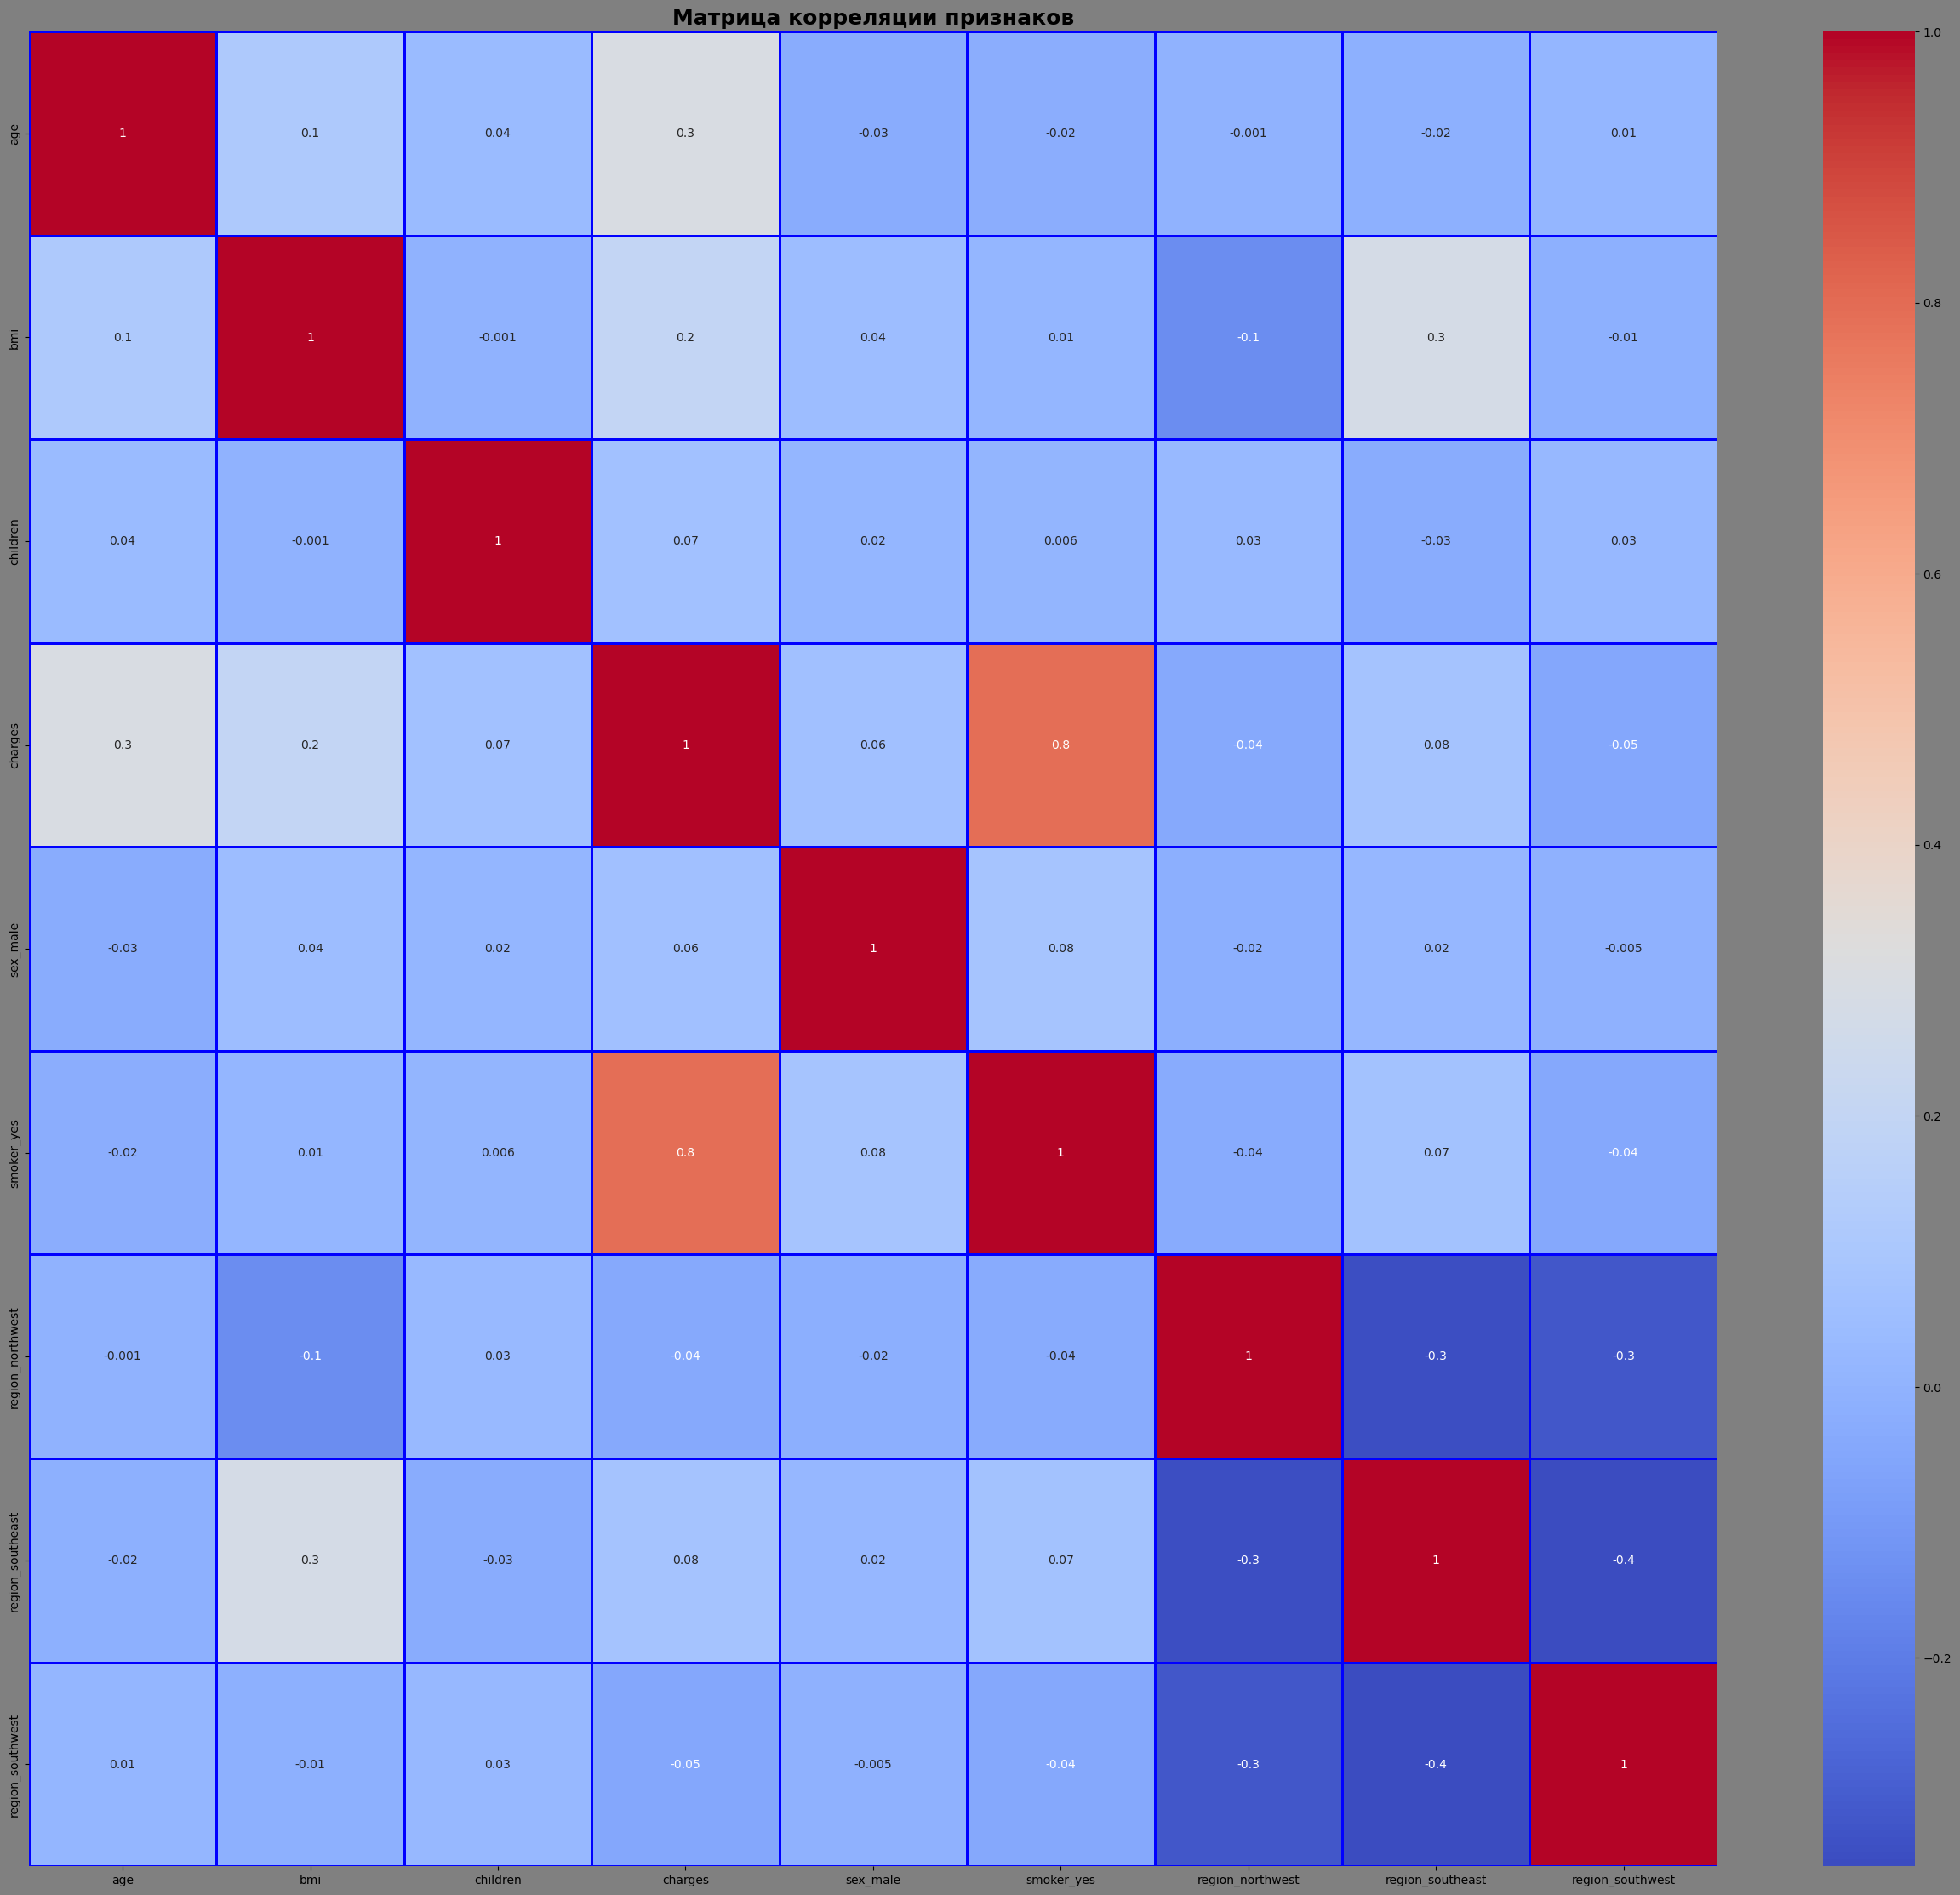

In [128]:
# построим матрицу корреляции признаков
plt.figure(figsize=(32, 28), facecolor='gray')
sns.heatmap(df.corr(),
            annot=True,
            fmt='.1g',
            cmap='coolwarm',
            linecolor='blue',
            linewidths=1)
plt.title('Матрица корреляции признаков',
          fontsize=18,
          fontweight='bold')

Чтобы избежать проблем, связанных с мультиколлинеарностью(наличие линейной зависимости между объясняющими переменными(независимыми)). В парах объектов, где коэффициент корреляции больше или равен 0,9 или меньше или равен -0,9, удалим один из объектов.
Полная коллинеарность приводит к неопределенности параметров в линейной регрессионной модели.

<Axes: >

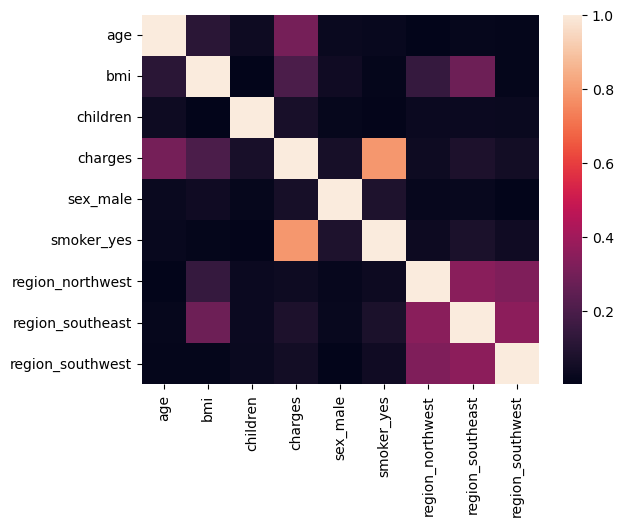

In [129]:
sns.heatmap(df.corr().abs(),
        xticklabels=df.corr().abs().columns,
        yticklabels=df.corr().abs().columns)

Здесь можно удалить столбцы меньшие 0.2

<Axes: >

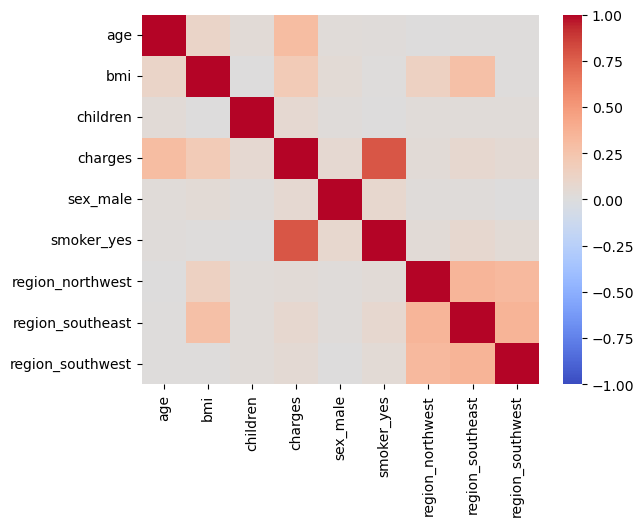

In [130]:
sns.heatmap(df.corr().abs(),
            xticklabels=df.corr().abs().columns,
            yticklabels=df.corr().abs().columns,  vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Проверка корреляций является важной частью процесса анализа поисковых данных. Этот анализ является одним из методов, используемых для определения того, какие функции больше всего влияют на целевую переменную, и, в свою очередь, используются при прогнозировании этой целевой переменной, как правило, используются для визуализации корреляционных матриц

In [ ]:
df = df.drop('region_northwest', axis=1)
df = df.drop('region_southwest', axis=1)
df = df.drop('region_southeast', axis=1)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         2772 non-null   int64  
 1   bmi         2772 non-null   float64
 2   children    2772 non-null   int64  
 3   charges     2772 non-null   float64
 4   sex_male    2772 non-null   float64
 5   smoker_yes  2772 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 130.1 KB


In [141]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0


In [143]:
# Целевая переменная
y = df['charges']
# Обучающие данные
X = df.drop('charges', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [144]:
# размеры обучающей и тестовой выборок
print('Обучающая выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

Обучающая выборка: (2217, 5)
Тестовая выборка: (555, 5)


In [145]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_train_predict = model_lr.predict(X_train)
y_test_predict = model_lr.predict(X_test)
metrics_lr = get_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_lr

{'MAE score Train': 4140.3,
 'MAE score Test': 4169.89,
 'RMSE score Train': 6016.99,
 'RMSE score Test': 6331.94,
 'R^2 score Train': 0.75,
 'R^2 score Test': 0.74}

## Задания 4-6, изменение перевода категориальных признаков в вещественные, проверка новых значений

### Задание 4

In [166]:
df = pd.read_csv('Insurance.csv')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [168]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Label Encoder - это метод, который используется для преобразования категориальных столбцов в числовые, чтобы они соответствовали моделям машинного обучения, которые принимают только числовые данные. Он присваивает каждой категории в объекте значение от 0 до $n$, где $n$ - количество категорий.

In [169]:
cat_list = [x for x in df.columns if df[x].dtype == 'object']
cat_list

['sex', 'smoker', 'region']

In [170]:
for feature in cat_list:
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])

In [171]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Задание 5

In [172]:
# Целевая переменная
y = df['charges']
# Обучающие данные
X = df.drop('charges', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [173]:
# размеры обучающей и тестовой выборок
print('Обучающая выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

Обучающая выборка: (2217, 6)
Тестовая выборка: (555, 6)


In [174]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_train_predict = model_lr.predict(X_train)
y_test_predict = model_lr.predict(X_test)
metrics_lr = get_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_lr

{'MAE score Train': 4136.38,
 'MAE score Test': 4167.3,
 'RMSE score Train': 6002.06,
 'RMSE score Test': 6318.42,
 'R^2 score Train': 0.75,
 'R^2 score Test': 0.74}

### Задание 6

<Axes: >

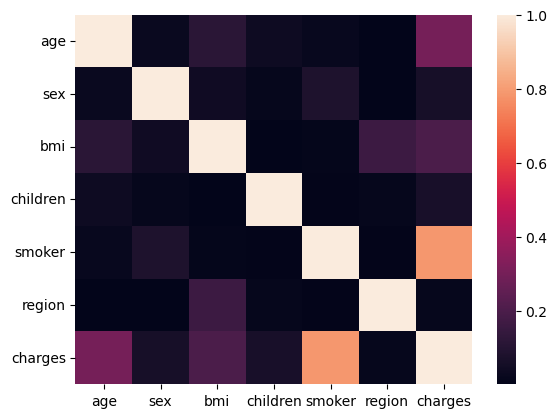

In [175]:
sns.heatmap(df.corr().abs(),
        xticklabels=df.corr().abs().columns,
        yticklabels=df.corr().abs().columns)

С целевой переменной (charges) так и выявляется регион слабо скоррелированным, можно не брать в расчет.

In [202]:
data = df
data = data.drop('region', axis=1)
# Целевая переменная
y = data['charges']
# Обучающие данные
X = data.drop('charges', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [203]:
X.describe()

,age,sex,bmi,children,smoker
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.507215,30.701349,1.101732,0.203463
std,14.081459,0.500038,6.129449,1.214806,0.402647
min,18.000000,0.000000,15.960000,0.000000,0.000000
25%,26.000000,0.000000,26.220000,0.000000,0.000000
50%,39.000000,1.000000,30.447500,1.000000,0.000000
75%,51.000000,1.000000,34.770000,2.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000


In [204]:
X_train.describe()

,age,sex,bmi,children,smoker
count,2217.000000,2217.0000,2217.000000,2217.000000,2217.000000
mean,39.308976,0.5106,30.715453,1.104646,0.209292
std,13.932427,0.5000,6.103186,1.211729,0.406895
min,18.000000,0.0000,15.960000,0.000000,0.000000
25%,27.000000,0.0000,26.220000,0.000000,0.000000
50%,39.000000,1.0000,30.495000,1.000000,0.000000
75%,51.000000,1.0000,34.770000,2.000000,0.000000
max,64.000000,1.0000,52.580000,5.000000,1.000000


In [205]:
# размеры обучающей и тестовой выборок
print('Обучающая выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

Обучающая выборка: (2217, 5)
Тестовая выборка: (555, 5)


In [206]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_train_predict = model_lr.predict(X_train)
y_test_predict = model_lr.predict(X_test)
metrics_lr = get_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_lr

{'MAE score Train': 4140.3,
 'MAE score Test': 4169.89,
 'RMSE score Train': 6016.99,
 'RMSE score Test': 6331.94,
 'R^2 score Train': 0.75,
 'R^2 score Test': 0.74}

<Axes: >

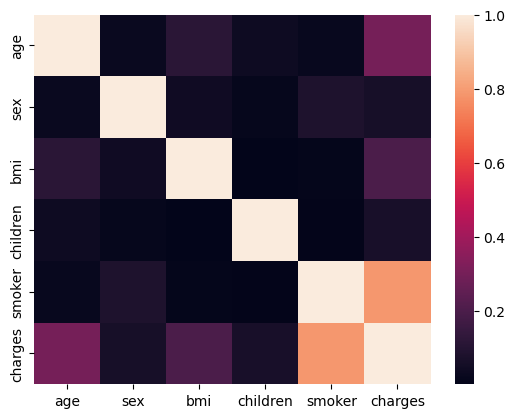

In [207]:
sns.heatmap(data.corr().abs(),
        xticklabels=data.corr().abs().columns,
        yticklabels=data.corr().abs().columns)

In [208]:
data = data.drop('children', axis=1)
# Целевая переменная
y = data['charges']
# Обучающие данные
X = data.drop('charges', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [209]:
data.head()

,age,sex,bmi,smoker,charges
0,19,0,27.900,1,16884.92400
1,18,1,33.770,0,1725.55230
2,28,1,33.000,0,4449.46200
3,33,1,22.705,0,21984.47061
4,32,1,28.880,0,3866.85520


In [210]:
# размеры обучающей и тестовой выборок
print('Обучающая выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

Обучающая выборка: (2217, 4)
Тестовая выборка: (555, 4)


In [211]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_train_predict = model_lr.predict(X_train)
y_test_predict = model_lr.predict(X_test)
metrics_lr = get_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_lr

{'MAE score Train': 4180.24,
 'MAE score Test': 4236.91,
 'RMSE score Train': 6041.83,
 'RMSE score Test': 6383.73,
 'R^2 score Train': 0.75,
 'R^2 score Test': 0.73}

<Axes: >

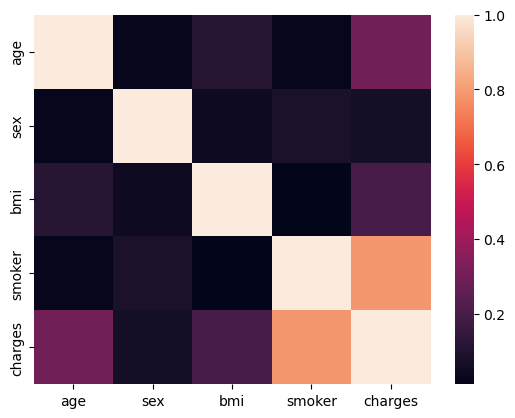

In [212]:
sns.heatmap(data.corr().abs(),
        xticklabels=data.corr().abs().columns,
        yticklabels=data.corr().abs().columns)

### Вывод
Алгоритм линейной регрессии для данного датафрейма дает следующие результаты:
1. При использовании OneHotEncoder значения метрик тренировочная выборка MAE: 4133.81, RMSE : 5999.39, R^2: 0.75, тестовая выборка MAE: 4160.25, RMSE: 6319.27 R^2: 0.74. 
2. При отборе признаков по 1 пункту значения метрик: 1. тренировочная выборка MAE: 4140.3, RMSE: 6016.99, R^2: 0.75. 2. тестовая выборка: MAE: 4169.89, RMSE: 6331.94, R^2: 0.74.
--------------------------------------------------------------------------------------------------------------------------------
1. При использовании LabelEncoder метрики приняли такие значения: для тренировочной выборки: MAE: 4136.38, RMSE : 6002.06, R^2: 0.75. Для тестовой выборки: MAE: 4167.3, RMSE: 6318.42, R^2: 0.74.
2. При отборе признаков значения метрик: для тренировочной выборки: MAE: 4180.22, RMSE : 6041.84, R^2: 0.75. Для тестовой выборки: MAE: 4236.65, RMSE: 6383.8, R^2: 0.73.
--------------------------------------------------------------------------------------------------------------------------------
Коэффициент детерминации: Во всех рассмотренных моделях, коэффициент детерминации для тренировочной выборки остается на уровне 0.75, а для тестовой — 0.74 или 0.73. Модель достаточно хорошо работает. Коэффициент, близкий к 1, указывает на высокую степень согласования между моделью и реальными данными. Однако, данная линейная регрессия в разы хуже.

Значения метрик MAE и RMSE остаются примерно на одном уровне при разных подходах к кодированию категориальных признаков (OneHotEncoder и LabelEncoder), а также при отборе признаков. Модель предсказала выходную переменную с примерно одинаковым уровнем точности, независимо от выбранного подхода.

Независимо от того, какой метод кодирования использовался, значительных различий в метриках модели нет. 

В некоторых случаях отбор признаков немного увеличил ошибки (особенно на тестовой выборке), что может указывать на то, что удаление некоторых признаков привело к потере информации.